In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'/Users/andrlluuk/CMF/Market Making'

In [3]:
os.chdir('../Data/md')

In [4]:
btc_lobs = pd.read_csv('./btcusdt_Binance_LinearPerpetual/lobs.csv', skipinitialspace = True)
btc_trades = pd.read_csv('./btcusdt_Binance_LinearPerpetual/trades.csv', skipinitialspace = True) 
#eth_lobs = pd.read_csv('./ethusdt_Binance_LinearPerpetual/lobs.csv', skipinitialspace = True) 
#eth_trades = pd.read_csv('./ethusdt_Binance_LinearPerpetual/trades.csv', skipinitialspace = True) 

In [5]:
btc_lobs.receive_ts 1655984000000000000

0          1655942402250125991
1          1655942402657844605
2          1655942403346968722
3          1655942404080791047
4          1655942404452706766
                  ...         
2541351    1656028781390653694
2541352    1656028781423672729
2541353    1656028781457683317
2541354    1656028781492806433
2541355    1656028781526713137
Name: receive_ts, Length: 2541356, dtype: int64

## Пункт 1. Best уровни стаканов

In [5]:
columns_ = btc_lobs.columns

In [7]:
#измененим названия колонок для удобства
columns_ = btc_lobs.columns
for column in columns_:
    if 'LinearPerpetual' in column:
        btc_lobs.rename(columns = {column: column.strip('btcusdt:Binance:LinearPerpetual')[1:]}, inplace = True)
btc_lobs['receive_ts'] = btc_lobs['receive_ts'].apply(lambda x: pd.to_datetime(x))
btc_lobs['exchange_ts'] = btc_lobs['exchange_ts'].apply(lambda x: pd.to_datetime(x))

columns_ = eth_lobs.columns
for column in columns_:
    if 'LinearPerpetual' in column:
        eth_lobs.rename(columns = {column: column.strip('ethusdt:Binance:LinearPerpetual')[1:]}, inplace = True)
eth_lobs['receive_ts'] = eth_lobs['receive_ts'].apply(lambda x: pd.to_datetime(x))
eth_lobs['exchange_ts'] = eth_lobs['exchange_ts'].apply(lambda x: pd.to_datetime(x))

In [ ]:
btc_trades['receive_ts'] = btc_trades['receive_ts'].apply(lambda x: pd.to_datetime(x))
btc_trades['exchange_ts'] = btc_trades['exchange_ts'].apply(lambda x: pd.to_datetime(x))
eth_trades['receive_ts'] = eth_trades['receive_ts'].apply(lambda x: pd.to_datetime(x))
eth_trades['exchange_ts'] = eth_trades['exchange_ts'].apply(lambda x: pd.to_datetime(x))

In [9]:
#Просто втупую посмотрим уровни стаканов
best_btc_ask = btc_lobs['ask_price_0']
best_btc_bid = btc_lobs['bid_price_0']
best_eth_ask = eth_lobs['ask_price_0']
best_eth_bid = eth_lobs['bid_price_0']

In [10]:
import matplotlib.pyplot as plt

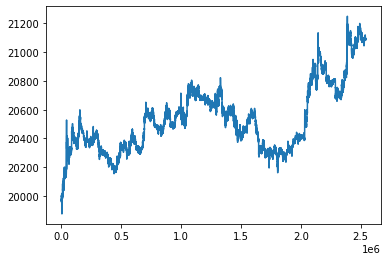

In [11]:
#уровень продажи BTC
plt.plot(best_btc_ask)

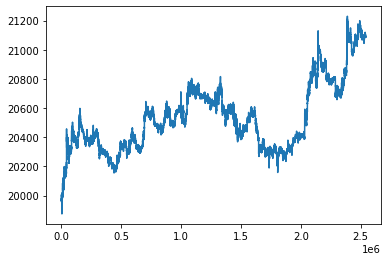

In [12]:
#уровень покупки BTC
plt.plot(best_btc_bid)

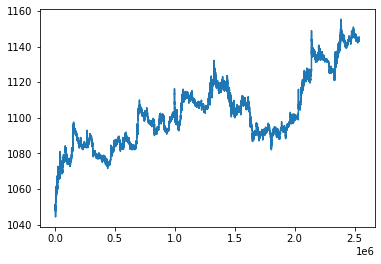

In [13]:
#уровень продажи ETH
plt.plot(best_eth_ask)

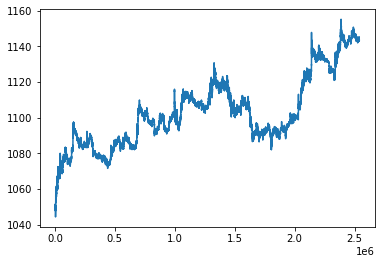

In [14]:
#уровень покупки ETH
plt.plot(best_eth_bid)

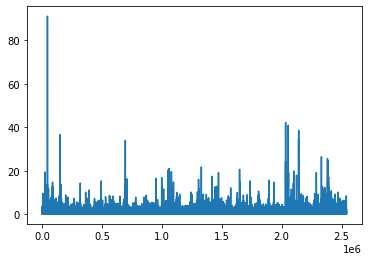

In [15]:
#Глянем на спрэд между bid и ask
#BTC
plt.plot(best_btc_ask - best_btc_bid)

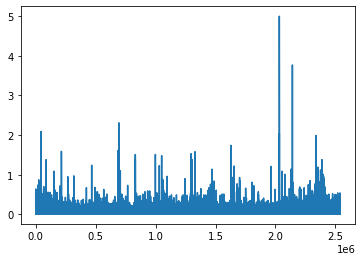

In [16]:
#ETH
plt.plot(best_eth_ask - best_eth_bid)

Посмотрим, как ведет себя price проведенных сделок

In [17]:
btc_trades.head()

,receive_ts,exchange_ts,aggro_side,price,size
0,2022-06-23 00:00:02.624789714,2022-06-23 00:00:02.623,BID,19977.5,0.001
1,2022-06-23 00:00:05.293556247,2022-06-23 00:00:05.292,BID,19977.5,0.041
2,2022-06-23 00:00:05.293628020,2022-06-23 00:00:05.292,BID,19977.5,0.036
3,2022-06-23 00:00:05.293832021,2022-06-23 00:00:05.292,BID,19977.5,0.001
4,2022-06-23 00:00:05.293929517,2022-06-23 00:00:05.292,BID,19977.5,0.001


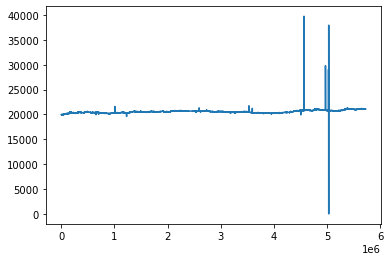

In [18]:
plt.plot(btc_trades['price'])

In [19]:
btc_trades[btc_trades['price'] == 0.0] #есть один выброс(или бесплатная покупка 0.001 битка)

,receive_ts,exchange_ts,aggro_side,price,size
5032612,2022-06-23 21:04:54.203729877,2022-06-23 21:04:54.202,BID,0.0,0.001


In [20]:
#Посмотрим скачки в другую сторону: 
btc_trades[btc_trades['price'] > 22000]

,receive_ts,exchange_ts,aggro_side,price,size
4567051,2022-06-23 19:47:25.853109188,2022-06-23 19:47:25.836,ASK,39758.88,0.001
4971473,2022-06-23 20:48:50.557211543,2022-06-23 20:48:50.556,ASK,29817.98,0.001
5028915,2022-06-23 21:04:22.229623269,2022-06-23 21:04:22.227,ASK,29061.08,0.001
5032414,2022-06-23 21:04:52.439506062,2022-06-23 21:04:52.438,ASK,37957.31,0.002
5032499,2022-06-23 21:04:53.518896460,2022-06-23 21:04:53.517,ASK,24246.15,0.038


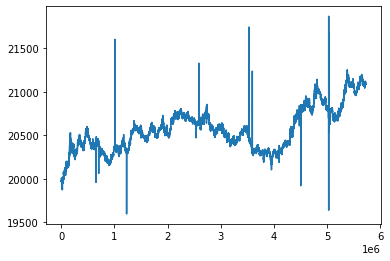

In [21]:
#Попробуем посмотреть трейды без этих скачков
plt.plot(btc_trades[(btc_trades['price'] < 22000) & (btc_trades['price'] > 15000)]['price'])

In [22]:
#Теперь есть скачки поменьше
#Посмотрим их более подробно
btc_trades[(btc_trades['price'] > 21400) | (btc_trades['price'] < 19800)]

,receive_ts,exchange_ts,aggro_side,price,size
1008945,2022-06-23 04:44:16.837669748,2022-06-23 04:44:16.835,ASK,21603.29,0.001
1228986,2022-06-23 06:04:01.546785483,2022-06-23 06:04:01.545,BID,19594.40,0.001
3530804,2022-06-23 15:23:36.289356298,2022-06-23 15:23:36.285,ASK,21744.46,0.001
4567051,2022-06-23 19:47:25.853109188,2022-06-23 19:47:25.836,ASK,39758.88,0.001
4971473,2022-06-23 20:48:50.557211543,2022-06-23 20:48:50.556,ASK,29817.98,0.001
5028915,2022-06-23 21:04:22.229623269,2022-06-23 21:04:22.227,ASK,29061.08,0.001
5032218,2022-06-23 21:04:50.521067650,2022-06-23 21:04:50.520,BID,19637.57,0.100
5032376,2022-06-23 21:04:51.679795320,2022-06-23 21:04:51.678,BID,19790.18,0.014
5032409,2022-06-23 21:04:52.373027923,2022-06-23 21:04:52.371,ASK,21869.40,0.069
5032414,2022-06-23 21:04:52.439506062,2022-06-23 21:04:52.438,ASK,37957.31,0.002


Выделяется относительно большой бид с 19637.57 на 0.1 битка

In [23]:
eth_trades[eth_trades['price'] == eth_trades['price'].min()] #минимальная цена сделки

,receive_ts,exchange_ts,aggro_side,price,size
4286565,2022-06-23 21:04:42.964664698,2022-06-23 21:04:42.963,BID,170.75,0.009


In [24]:
eth_trades[eth_trades['price']< 1000] #причем до 1000 их всего 2.

,receive_ts,exchange_ts,aggro_side,price,size
4286565,2022-06-23 21:04:42.964664698,2022-06-23 21:04:42.963,BID,170.75,0.009
4307493,2022-06-23 21:11:44.410876269,2022-06-23 21:11:44.410,BID,878.28,1.341


In [25]:
eth_trades[eth_trades['price']>1160] #самые высокие аски

,receive_ts,exchange_ts,aggro_side,price,size
4090493,2022-06-23 20:12:54.521126348,2022-06-23 20:12:54.519,ASK,1172.41,0.10
4288316,2022-06-23 21:04:56.586697047,2022-06-23 21:04:56.585,ASK,1169.93,0.07
4288439,2022-06-23 21:04:58.110276600,2022-06-23 21:04:58.109,ASK,1213.26,0.02


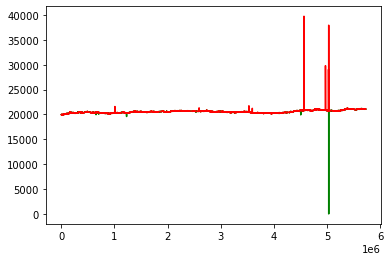

In [26]:
#Разделим на BID и ASK
plt.plot(btc_trades[btc_trades['aggro_side'] == 'BID']['price'], color = 'green')
plt.plot(btc_trades[btc_trades['aggro_side'] == 'ASK']['price'], color = 'red')

# Пункт 2. Статистики для размера трейда

In [27]:
#снова по-тупому просто построим гистограмму
btc_trades['size']

0          0.001
1          0.041
2          0.036
3          0.001
4          0.001
           ...  
5727709    0.001
5727710    0.059
5727711    0.137
5727712    0.030
5727713    0.025
Name: size, Length: 5727714, dtype: float64

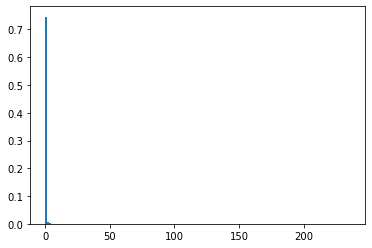

In [28]:
counts, bins, bars = plt.hist(btc_trades['size'], bins = int(btc_trades['size'].shape[0]**(1/3)), density = True)

Получилось слишком неравномерно: попробуем взять логарифмы от размера сделок

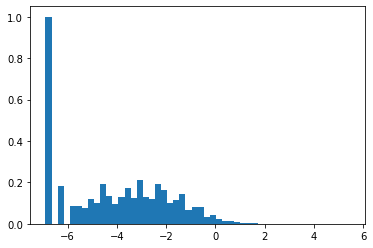

In [29]:
counts, bins, bars =plt.hist(np.log(btc_trades['size']), bins = 50, density = True)

Получается, что у нас огромная куча маленьких сделок(вот эти 0.001) и остальные сделки. Давайте посмотрим процент таких сделок

In [30]:
btc_trades[btc_trades['size'] < 0.005].shape[0]/btc_trades['size'].shape[0] 

0.3360962156979207

In [31]:
btc_trades[btc_trades['size'] < 0.015].shape[0]/btc_trades['size'].shape[0] 

0.48214540739988065

In [32]:
btc_trades[btc_trades['size'] < 0.02].shape[0]/btc_trades['size'].shape[0] 

0.5128814043438621

А теперь выпилим этот 51% и посмотрим на более весомые размеры сделок

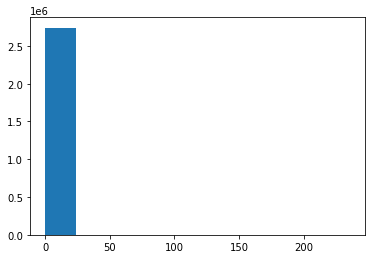

In [33]:
counts, bins, bars =plt.hist(btc_trades[btc_trades['size'] > 0.02]['size'])

Все еще не очень. Будем пробовать выпилить дальше

In [34]:
btc_trades[btc_trades['size'] < 1].shape[0]/btc_trades['size'].shape[0] 

0.9798919778466593

Посмотрим распределение на этом участке

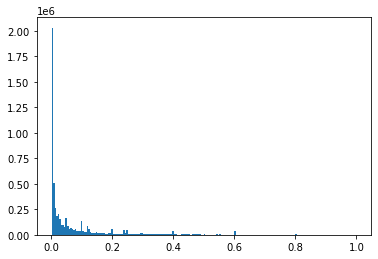

In [35]:
counts, bins, bars =plt.hist(btc_trades[btc_trades['size'] < 1]['size'], bins = 200)

Ура, что-то похожее на экспоненциальное

Построим функцию распределения и попробуем фитануть экспоненциальным

In [36]:
from scipy.stats import expon
loc, scale = expon.fit(btc_trades[btc_trades['size'] < 1]['size'])

In [37]:
scale

0.07811000489795977

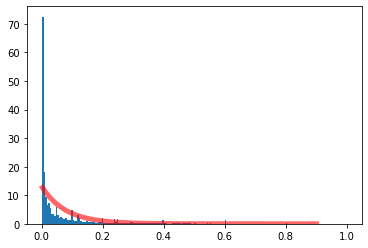

In [38]:
x = np.linspace(expon.ppf(0.01, loc = loc, scale = scale), expon.ppf(0.99999, loc = loc, scale = scale), 1000)
plt.plot(x, expon.pdf(x, loc = loc, scale = scale), 'r-', lw=5, alpha=0.6, label='expon pdf')
counts, bins, bars =plt.hist(btc_trades[btc_trades['size'] < 1]['size'], bins = 200, density = True, stacked = True)

Ошибка(успех)

Еще можно попробовать Парето

In [39]:
from scipy.stats import pareto
scale_b = pareto.fit(btc_trades[btc_trades['size'] < 1]['size'])

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [40]:
b = scale_b[0]
loc = scale_b[1]
scale = scale_b[2]

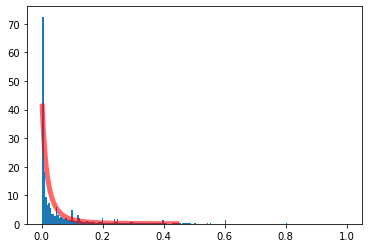

In [41]:
x = np.linspace(pareto.ppf(0.0001, b = b, loc = loc, scale = scale), pareto.ppf(0.99, b = b, loc = loc, scale = scale), 1000)
plt.plot(x, pareto.pdf(x, b = b, loc = loc, scale = scale), 'r-', lw=5, alpha=0.6, label='pareto pdf')
counts, bins, bars = plt.hist(btc_trades[btc_trades['size'] < 1]['size'], bins = 200, density = True, stacked = True)

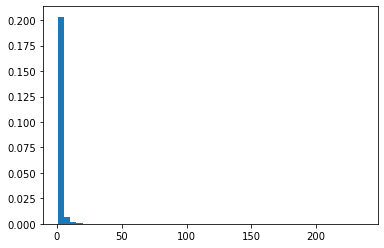

In [42]:
counts, bins, bars =plt.hist(btc_trades[btc_trades['size'] > 1]['size'], bins = 50, density= True, stacked = True)

In [43]:
scale_b = pareto.fit(btc_trades[btc_trades['size'] > 1]['size'])

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [44]:
scale_b # тоже похоже на парето

(1.5752888774139078, -0.0011906124039162158, 1.0021906123330049)

In [45]:
from scipy import stats
stats.describe(btc_trades['size'])

DescribeResult(nobs=5727714, minmax=(0.001, 235.793), mean=0.12200803165102181, variance=0.31323175143229426, skewness=86.17309304757686, kurtosis=19484.566423705288)

In [46]:
from scipy import stats
stats.describe(btc_trades[btc_trades['size'] < 1]['size'])

DescribeResult(nobs=5612541, minmax=(0.001, 0.999), mean=0.07911000489795977, variance=0.02161133257975998, skewness=3.053850281759065, kurtosis=10.635031895990583)

In [47]:
from scipy import stats
stats.describe(btc_trades[btc_trades['size'] > 1]['size'])

DescribeResult(nobs=102234, minmax=(1.001, 235.793), mean=2.3659444509654324, variance=11.128799691054132, skewness=20.46293386823035, kurtosis=803.9619445633808)

То есть мой вывод, что распределение настолько непонятное, что у него может даже не существовать среднего(быть равным бесконечности). Поэтому стоит посмотреть на отдельные участки

In [48]:
#глянем квантили
np.quantile(btc_trades['size'], 0.05)

0.001

In [49]:
#глянем квантили
np.quantile(btc_trades['size'], 0.15)

0.001

In [50]:
for val in np.linspace(0.15, 0.25, 200):
    if np.quantile(btc_trades['size'], val) > 0.001:
        print(val)
        break

0.24798994974874372


In [51]:
#нашли долю 0.001 в выборке

In [52]:
np.quantile(btc_trades['size'], 0.95)

0.519

<AxesSubplot:xlabel='size'>

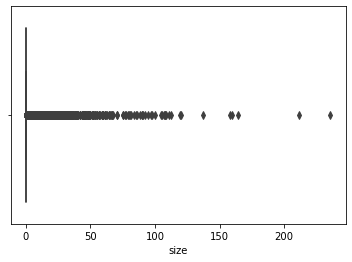

In [53]:
import seaborn as sns
sns.boxplot(x=btc_trades['size'])

<AxesSubplot:xlabel='size'>

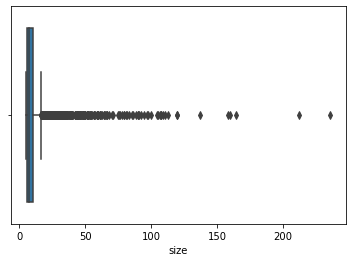

In [54]:
sns.boxplot(x=btc_trades[btc_trades['size'] > 5]['size'])

<AxesSubplot:xlabel='size'>

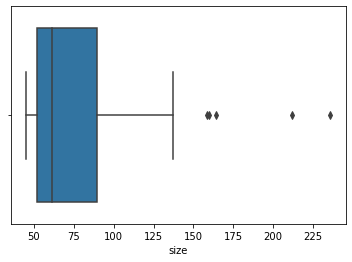

In [55]:
sns.boxplot(x=btc_trades[btc_trades['size'] > 45]['size'])

In [56]:
#посчитаем медиану
np.median(btc_trades['size'])

0.017

Повторим все пункты для эфира

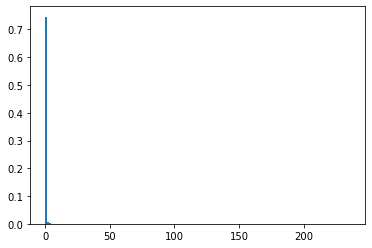

In [57]:
counts, bins, bars = plt.hist(btc_trades['size'], bins = int(btc_trades['size'].shape[0]**(1/3)), density = True)

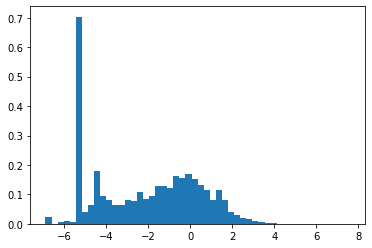

In [58]:
#Смотрим логи размера
counts, bins, bars =plt.hist(np.log(eth_trades['size']), bins = 50, density = True)

Тут уже понагляднее.

In [59]:
eth_trades[eth_trades['size'] < 0.002].shape[0]/eth_trades['size'].shape[0] 

0.007145959736164962

In [60]:
eth_trades[eth_trades['size'] < 0.005].shape[0]/eth_trades['size'].shape[0] 

0.014061298743506867

In [61]:
eth_trades[eth_trades['size'] < 0.01].shape[0]/eth_trades['size'].shape[0] 

0.23976964189976493

In [62]:
eth_trades[eth_trades['size'] < 0.015].shape[0]/eth_trades['size'].shape[0] 

0.305970717322797

In [63]:
eth_trades[eth_trades['size'] < 0.03].shape[0]/eth_trades['size'].shape[0] 

0.36403256348276697

Видим, что распределение уже более богатое на значения - нет концентрации на минимально возможном дробном значении

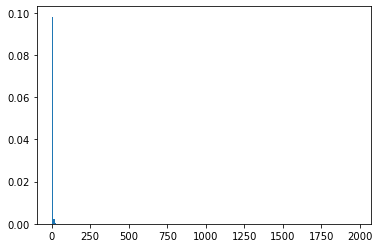

In [64]:
counts, bins, bars =plt.hist(eth_trades[eth_trades['size'] > 0.03]['size'], bins = 200, density = True, stacked = True)

Здесь так же не проглядывается какое-то гладкое распределение

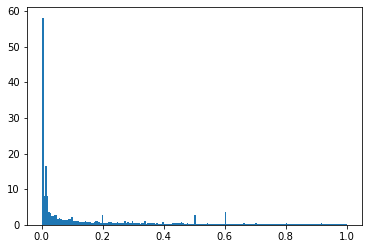

In [65]:
counts, bins, bars =plt.hist(eth_trades[eth_trades['size'] < 1]['size'], bins = 200, density = True, stacked = True)

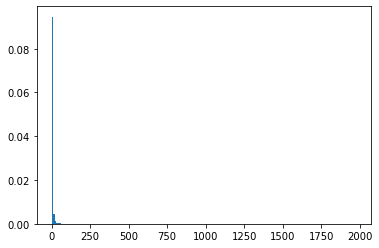

In [66]:
counts, bins, bars =plt.hist(eth_trades[eth_trades['size'] > 1]['size'], bins = 200, density = True, stacked = True)

In [67]:
scale_b = pareto.fit(eth_trades[eth_trades['size'] < 1]['size'])
print(scale_b)

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(0.5996087060810344, -0.012975816812501883, 0.013975816763923515)


In [68]:
scale_b = pareto.fit(eth_trades[eth_trades['size'] >= 1]['size'])
print(scale_b)

(1.0676339547777935, -0.24860333322529954, 1.2486033332219946)


In [69]:
scale_b = expon.fit(eth_trades[eth_trades['size'] >= 1]['size'])
print(scale_b)

(1.0, 3.389388502889207)


In [70]:
scale_b = expon.fit(eth_trades[eth_trades['size'] < 1]['size'])
print(scale_b)

(0.001, 0.17328645846550209)


Квантили и остальные базовые статистики для ETH

In [71]:
np.quantile(eth_trades['size'], 0.05)

0.005

In [72]:
np.quantile(eth_trades['size'], 0.95)

5.0

In [73]:
from scipy import stats
stats.describe(eth_trades['size'])

DescribeResult(nobs=4873803, minmax=(0.001, 1976.214), mean=1.2198729337234182, variance=40.11740031016206, skewness=99.65621119753435, kurtosis=19896.441893956573)

In [74]:
from scipy import stats
stats.describe(eth_trades[eth_trades['size'] < 5]['size'])

DescribeResult(nobs=4621126, minmax=(0.001, 4.999), mean=0.6086353129085857, variance=1.0443720376822971, skewness=2.3008919626874667, kurtosis=4.966731576765222)

In [75]:
from scipy import stats
stats.describe(eth_trades[eth_trades['size'] > 5]['size'])

DescribeResult(nobs=219695, minmax=(5.001, 1976.214), mean=13.50931926079337, variance=706.9817620255767, skewness=28.39809825247859, kurtosis=1364.652813335595)

In [76]:
np.median(eth_trades['size'])

0.153

<AxesSubplot:xlabel='size'>

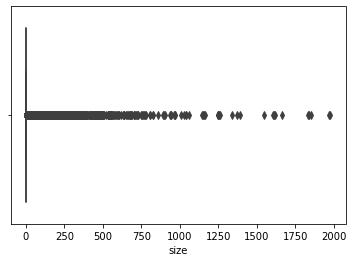

In [77]:
sns.boxplot(x=eth_trades['size'])

<AxesSubplot:xlabel='size'>

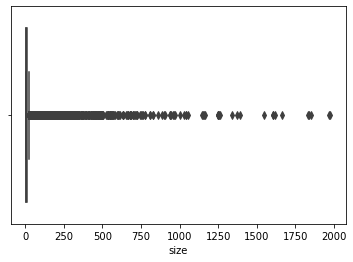

In [78]:
sns.boxplot(x=eth_trades[eth_trades['size'] > 5]['size'])

<AxesSubplot:xlabel='size'>

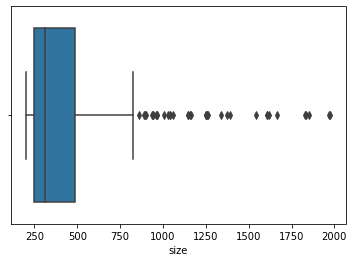

In [79]:
sns.boxplot(x=eth_trades[eth_trades['size'] > 200]['size'])

В целом эфира в единичном эквиваленте торгуют больше, распределение более сплющенное по кол-ву сделок, но более растянутое по размеру сделок

## Пункт 3. Гистограммы распределений для трейдов и объемов первых 5 уровней

Гистограммы для объемов мы смотрели в прошлый раз

Посмотрим гистограммы для первых 5 уровней

BTC

In [80]:
btc_bids = []
btc_asks = []
eth_bids = []
eth_asks = []
for i in range(5):
    btc_bids.append(btc_lobs[f'bid_vol_{i}'])
    btc_asks.append(btc_lobs[f'ask_vol_{i}'])
    eth_bids.append(btc_lobs[f'bid_vol_{i}'])
    eth_asks.append(btc_lobs[f'ask_vol_{i}'])
btc_bids = np.array(btc_bids)
btc_asks = np.array(btc_asks)
eth_bids = np.array(eth_bids)
eth_asks = np.array(eth_asks)

In [81]:
btc_bids = np.cumsum(btc_bids, axis = 0)
btc_asks = np.cumsum(btc_asks, axis = 0)
eth_bids = np.cumsum(eth_bids, axis = 0)
eth_asks = np.cumsum(eth_asks, axis = 0)

In [82]:
btc_bids

array([[12.381, 12.381, 12.381, ...,  7.845,  7.845,  8.671],
       [12.447, 12.507, 12.507, ..., 10.645, 10.645, 11.537],
       [12.497, 13.564, 13.564, ..., 10.69 , 10.69 , 11.582],
       [12.643, 13.63 , 13.63 , ..., 10.698, 10.698, 11.59 ],
       [12.848, 13.68 , 13.68 , ..., 10.71 , 10.71 , 11.602]])

Нарисуем биды и аски

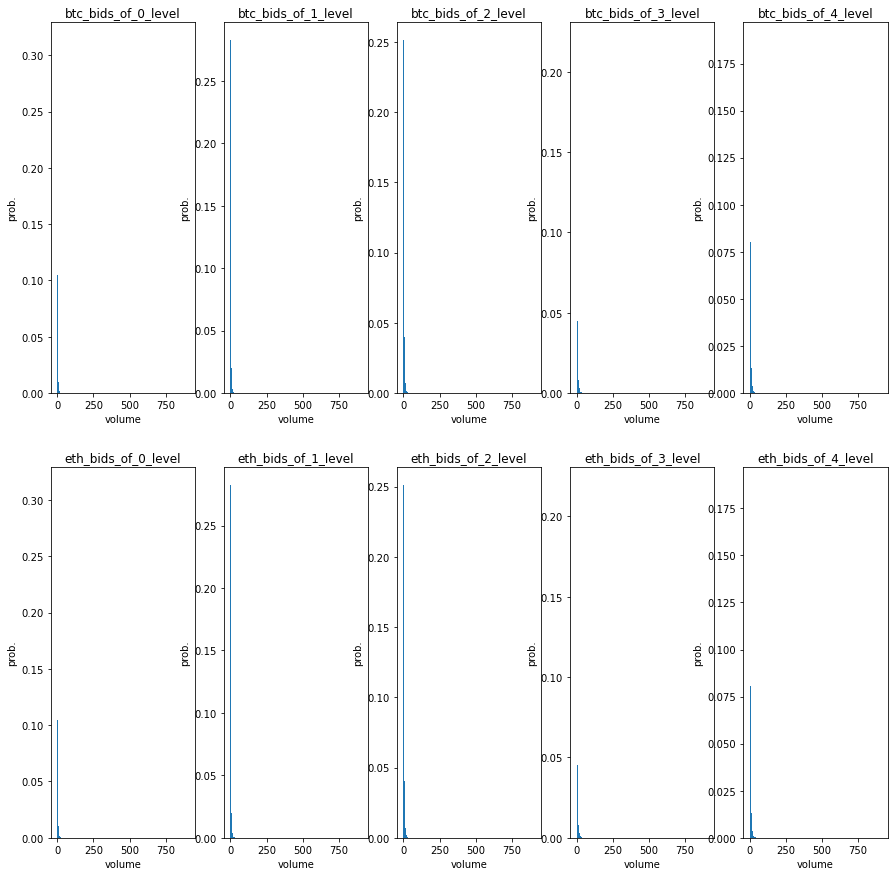

In [83]:
fig, axs = plt.subplots(2,5, figsize=(15, 15))
for j in range(5):
    axs[0][j].hist(btc_bids[j], bins = 500, density = True, stacked = True)
    axs[0][j].set(xlabel = "volume", ylabel = "prob.", title = f"btc_bids_of_{j}_level")
    
for j in range(5):
    axs[1][j].hist(eth_bids[j], bins = 500, density = True, stacked = True)
    axs[1][j].set(xlabel = "volume", ylabel = "prob.", title = f"eth_bids_of_{j}_level")


plt.show()

Они все, в общем то, похожи

Попробуем наложить их друг на друга:

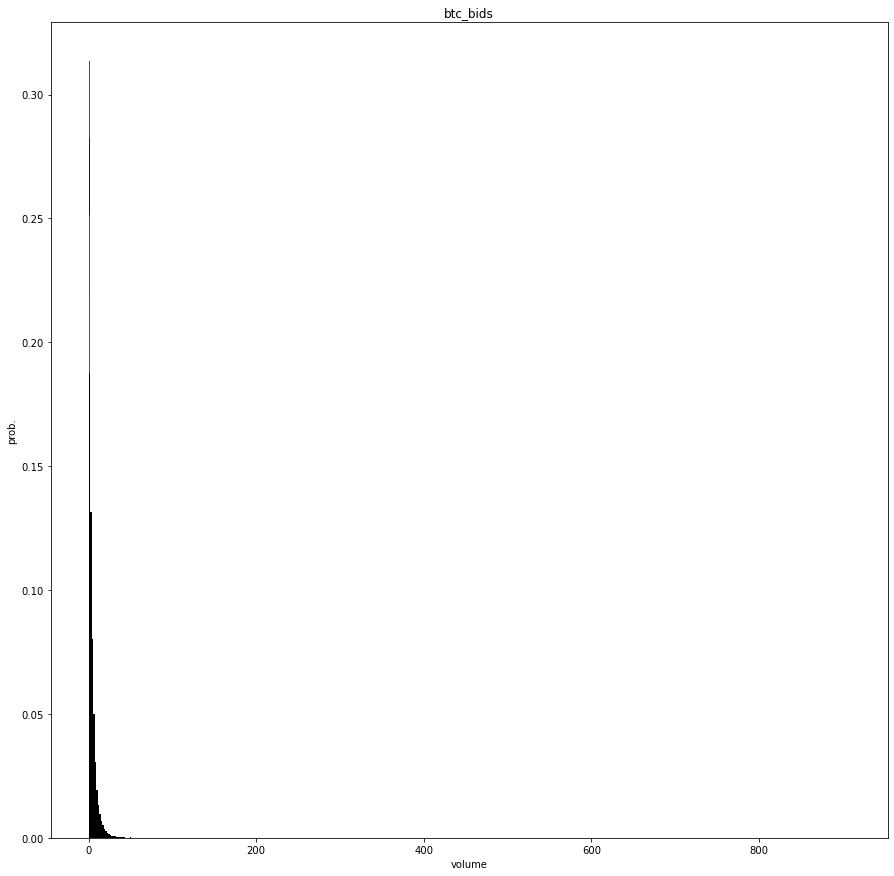

In [84]:
fig, axs = plt.subplots(1, figsize=(15, 15))
colors = ["red", "blue", "green", "brown", "black"]
for j in range(5):
    axs.hist(btc_bids[j], bins = 500, density = True, stacked = True, color = colors[j])
    axs.set(xlabel = "volume", ylabel = "prob.", title = f"btc_bids")

Отсюда можно сделать вывод, что красных(то есть первых в стакане) малых размеров больше всего и чем ниже уровень стакана, тем количество мелких заявок меньше по распределению

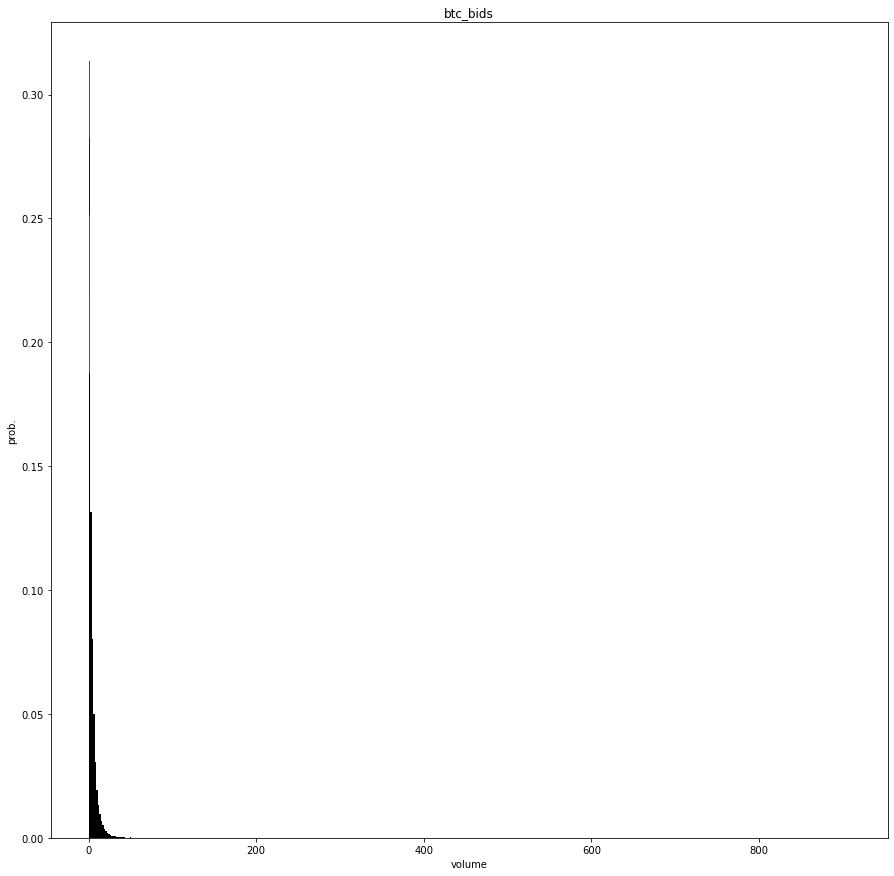

In [85]:
fig, axs = plt.subplots(1, figsize=(15, 15))
colors = ["red", "blue", "green", "brown", "black"]
for j in range(5):
    axs.hist(eth_bids[j], bins = 500, density = True, stacked = True, color = colors[j])
    axs.set(xlabel = "volume", ylabel = "prob.", title = f"btc_bids")

Same

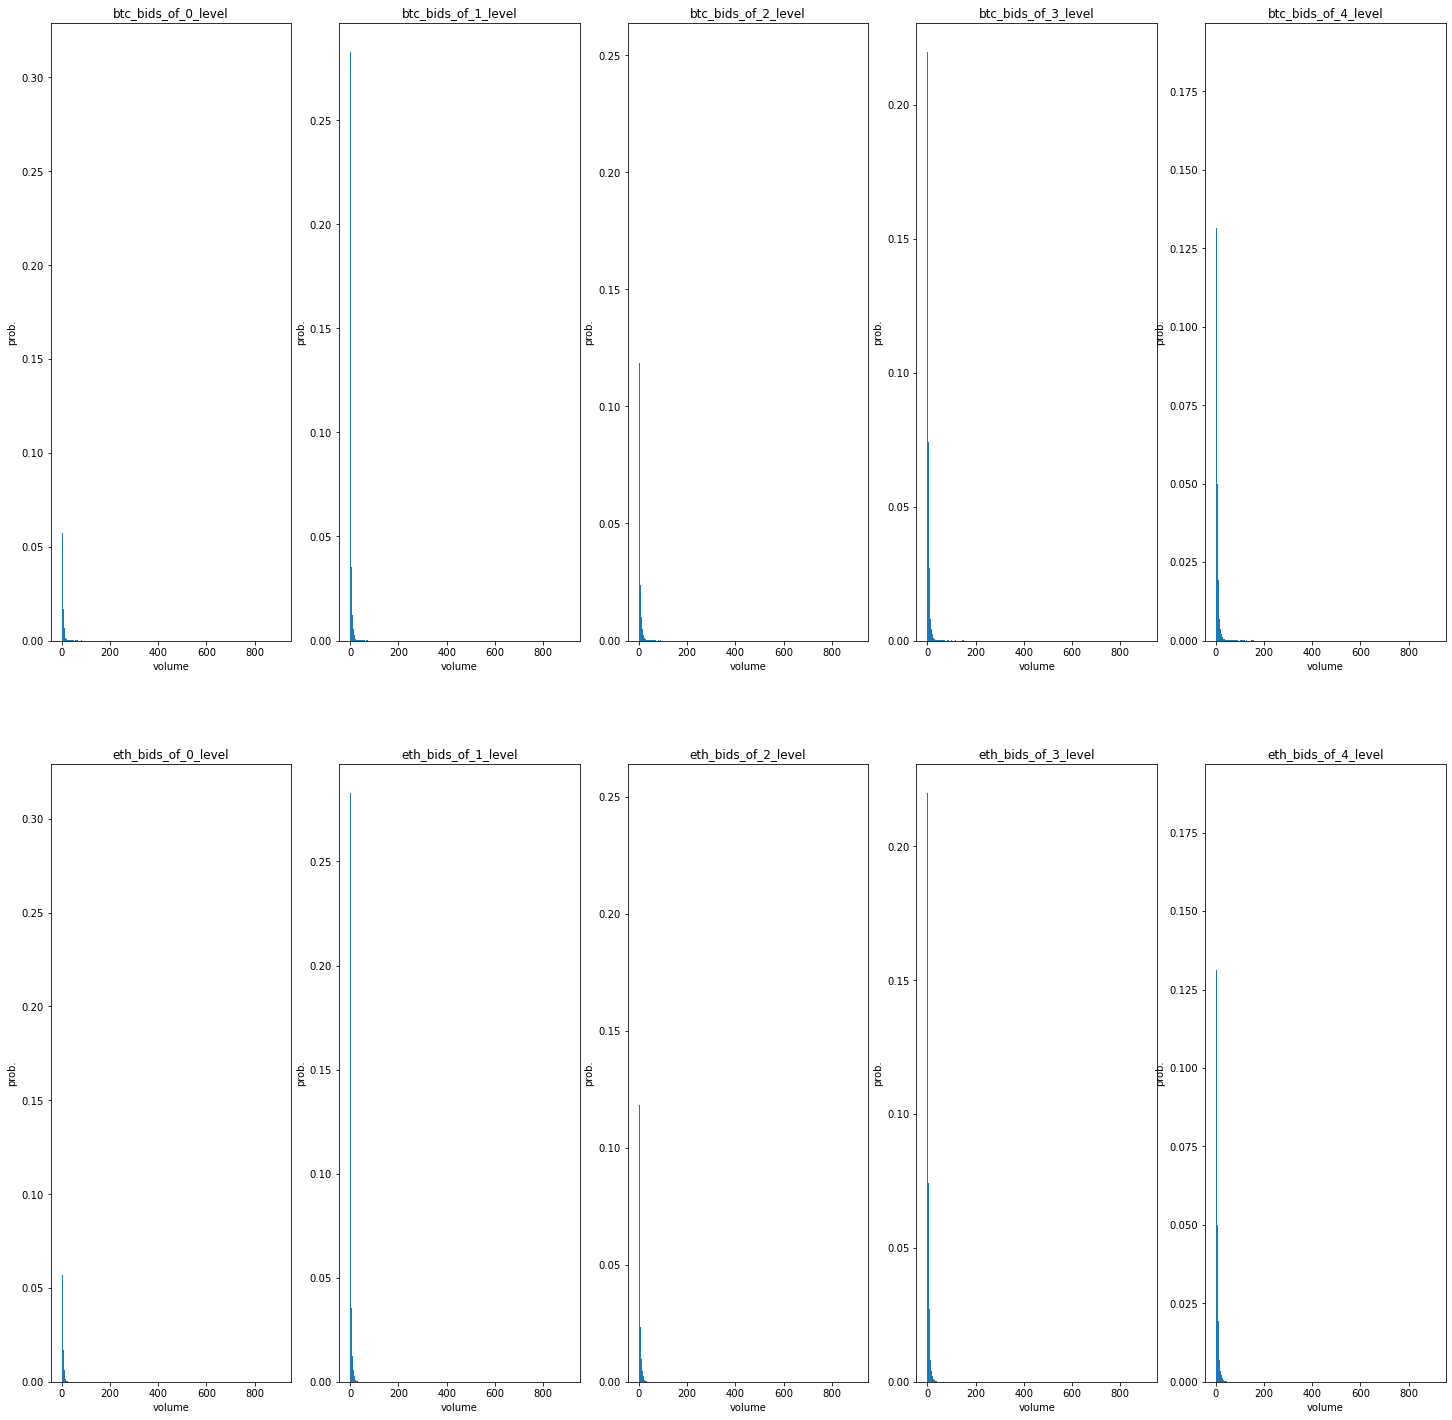

In [86]:
fig, axs = plt.subplots(2,5, figsize=(25, 25))
for j in range(5):
    axs[0][j].hist(btc_bids[j], bins = 500, density = True, stacked = True)
    axs[0][j].set(xlabel = "volume", ylabel = "prob.", title = f"btc_bids_of_{j}_level")
    
for j in range(5):
    axs[1][j].hist(eth_bids[j], bins = 500, density = True, stacked = True)
    axs[1][j].set(xlabel = "volume", ylabel = "prob.", title = f"eth_bids_of_{j}_level")


plt.show()

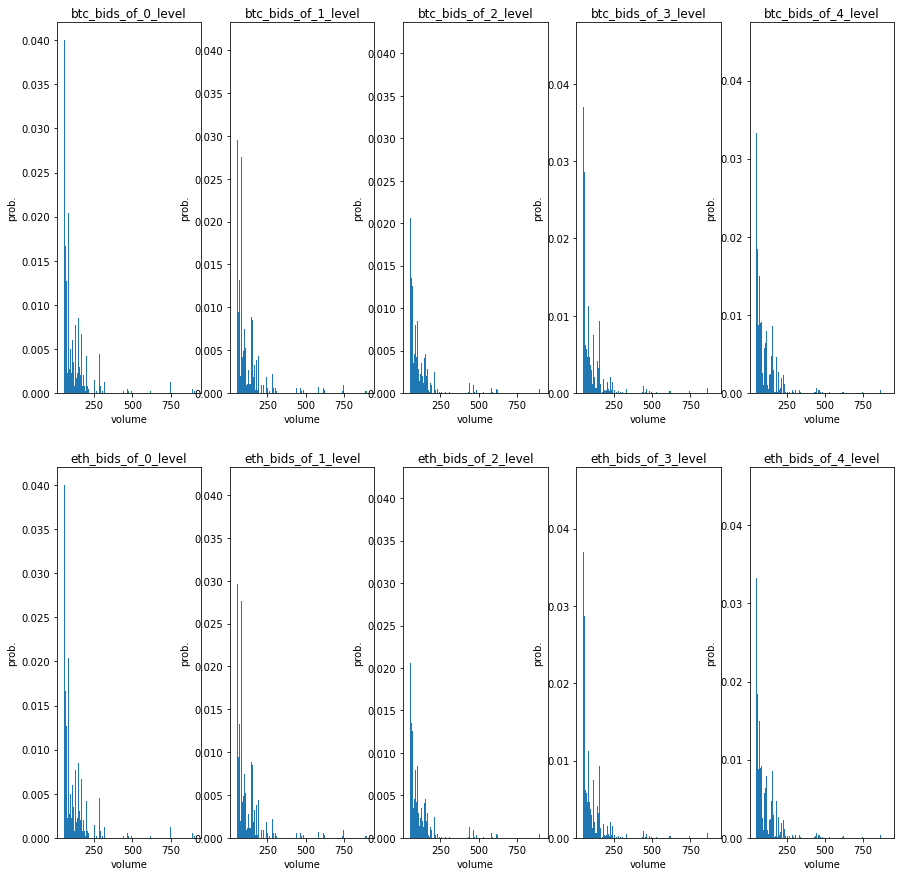

In [87]:
#распределение бидов при объеме больше 50
fig, axs = plt.subplots(2,5, figsize=(15, 15))
for j in range(5):
    axs[0][j].hist(btc_bids[j][btc_bids[j] > 50], bins = 500, density = True, stacked = True)
    axs[0][j].set(xlabel = "volume", ylabel = "prob.", title = f"btc_bids_of_{j}_level")
    
for j in range(5):
    axs[1][j].hist(eth_bids[j][eth_bids[j] > 50], bins = 500, density = True, stacked = True)
    axs[1][j].set(xlabel = "volume", ylabel = "prob.", title = f"eth_bids_of_{j}_level")


plt.show()

Гистограммы в целом похожи: можно ли сказать, что стакан на таких объемах определяется только первым уровнем?

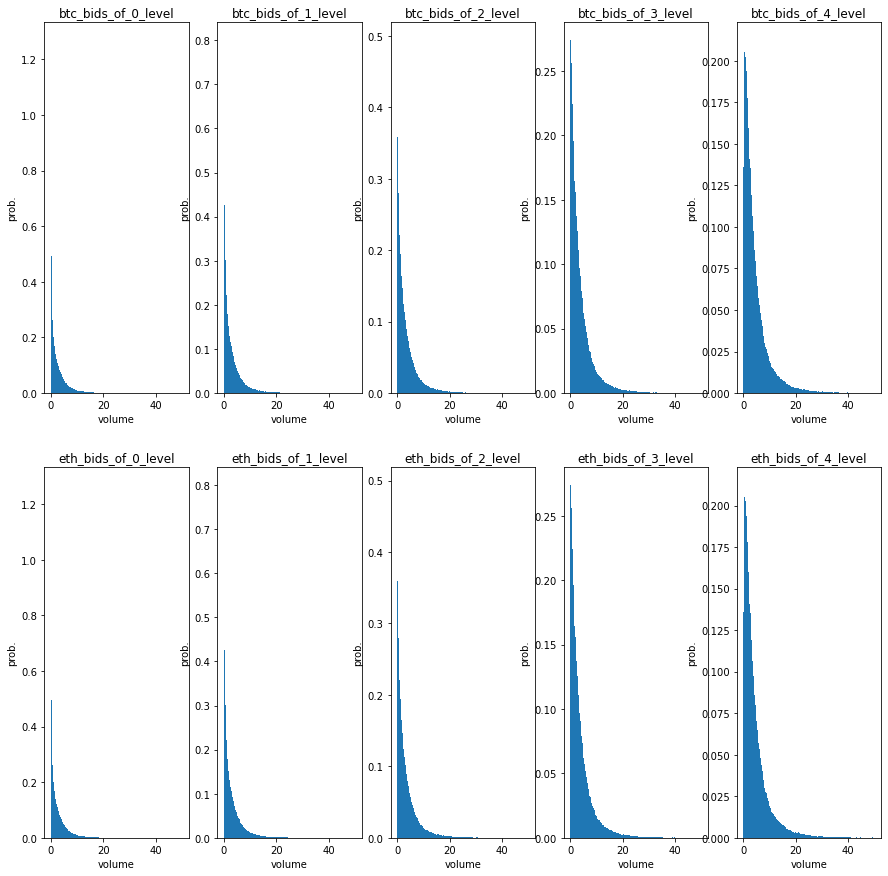

In [88]:
#распределение бидов при объеме меньше 50
fig, axs = plt.subplots(2,5, figsize=(15, 15))
for j in range(5):
    axs[0][j].hist(btc_bids[j][btc_bids[j] < 50], bins = 500, density = True, stacked = True)
    axs[0][j].set(xlabel = "volume", ylabel = "prob.", title = f"btc_bids_of_{j}_level")
    
for j in range(5):
    axs[1][j].hist(eth_bids[j][eth_bids[j] < 50], bins = 500, density = True, stacked = True)
    axs[1][j].set(xlabel = "volume", ylabel = "prob.", title = f"eth_bids_of_{j}_level")


plt.show()

Здеь распределение становится менее скошенным. Ну и понятно, что объем при увеличении уровня только увеличивается. То есть при росте уровня распределение более понятно, возможно, из него банально можно извлечь больше инфы.

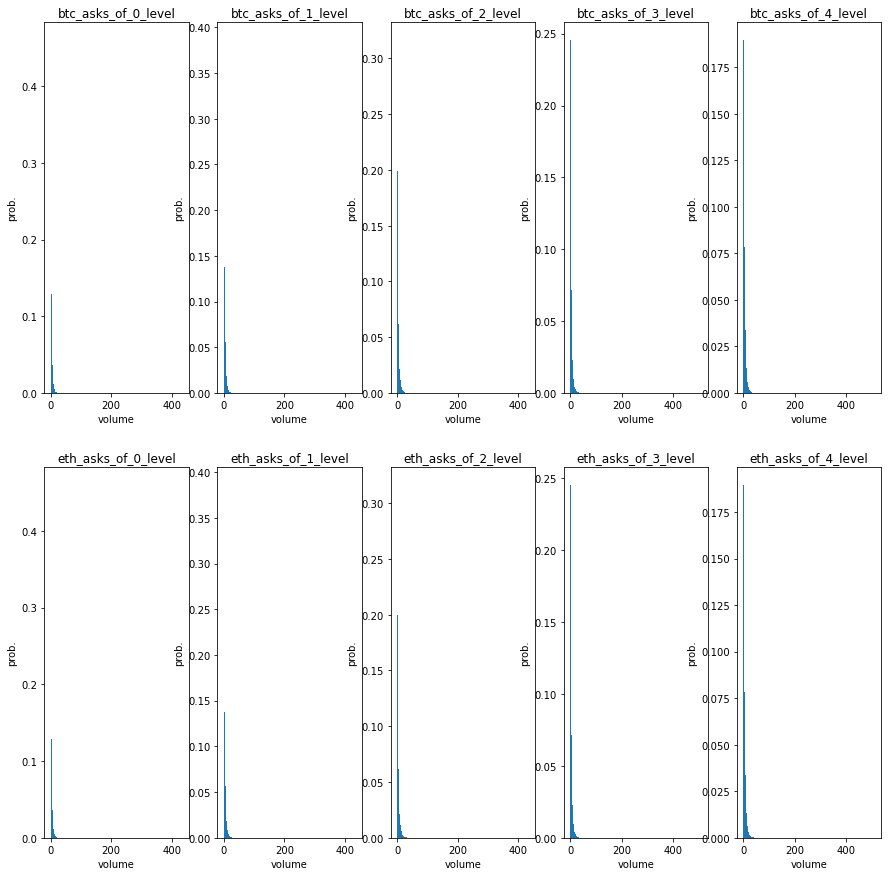

In [89]:
fig, axs = plt.subplots(2,5, figsize=(15, 15))
for j in range(5):
    axs[0][j].hist(btc_asks[j], bins = 500, density = True, stacked = True)
    axs[0][j].set(xlabel = "volume", ylabel = "prob.", title = f"btc_asks_of_{j}_level")
    
for j in range(5):
    axs[1][j].hist(eth_asks[j], bins = 500, density = True, stacked = True)
    axs[1][j].set(xlabel = "volume", ylabel = "prob.", title = f"eth_asks_of_{j}_level")


plt.show()

А вот тут ощущение что кол-во мелких асков сильно растет при изменении уровня стакана

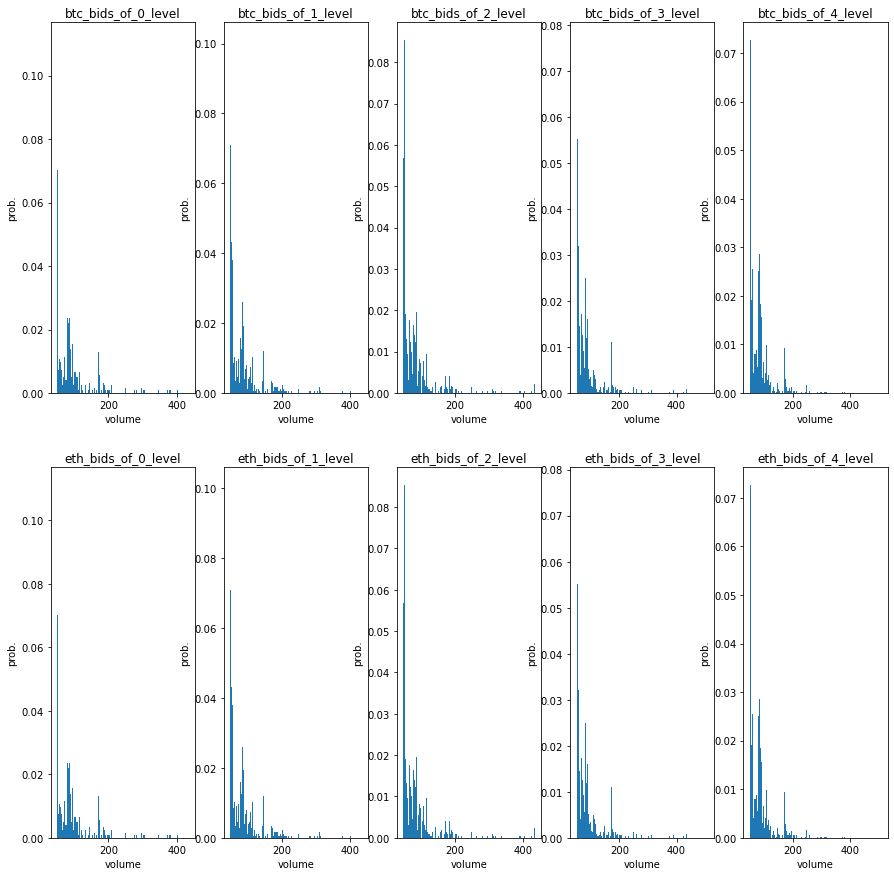

In [90]:
#Распределение асков при объеме больше 50
fig, axs = plt.subplots(2,5, figsize=(15, 15))
for j in range(5):
    axs[0][j].hist(btc_asks[j][btc_asks[j] > 50], bins = 500, density = True, stacked = True)
    axs[0][j].set(xlabel = "volume", ylabel = "prob.", title = f"btc_bids_of_{j}_level")
    
for j in range(5):
    axs[1][j].hist(eth_asks[j][eth_asks[j] > 50], bins = 500, density = True, stacked = True)
    axs[1][j].set(xlabel = "volume", ylabel = "prob.", title = f"eth_bids_of_{j}_level")


plt.show()

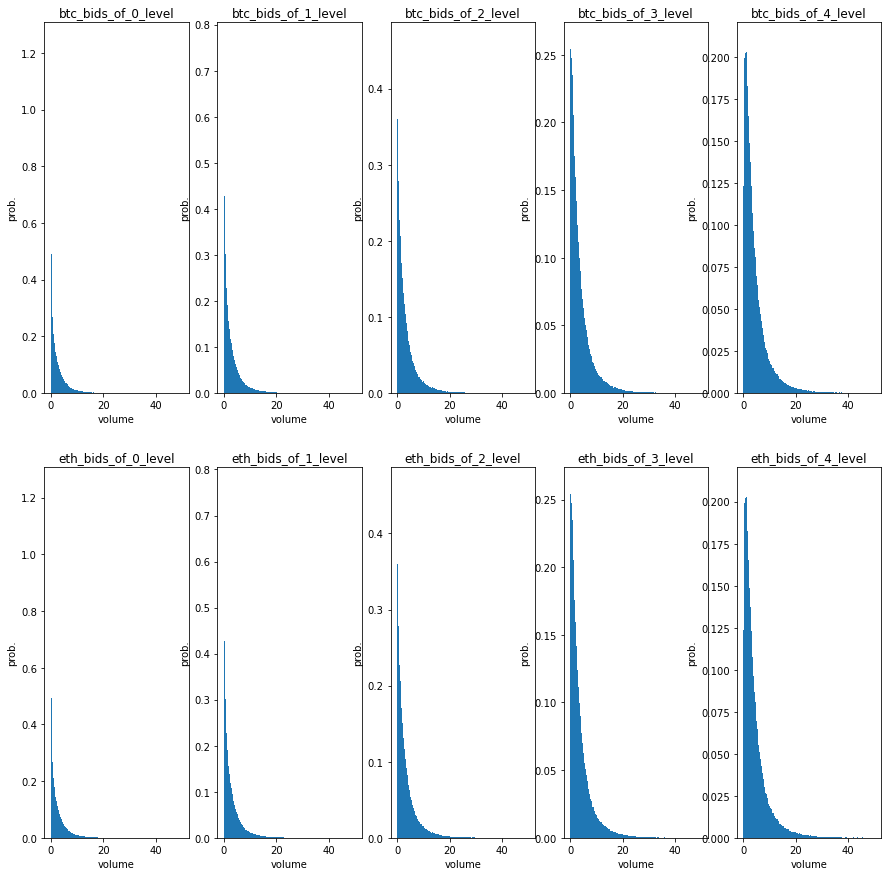

In [91]:
#Распределение асков при объеме меньше 50
fig, axs = plt.subplots(2,5, figsize=(15, 15))
for j in range(5):
    axs[0][j].hist(btc_asks[j][btc_asks[j] < 50], bins = 500, density = True, stacked = True)
    axs[0][j].set(xlabel = "volume", ylabel = "prob.", title = f"btc_bids_of_{j}_level")
    
for j in range(5):
    axs[1][j].hist(eth_asks[j][eth_asks[j] < 50], bins = 500, density = True, stacked = True)
    axs[1][j].set(xlabel = "volume", ylabel = "prob.", title = f"eth_bids_of_{j}_level")


plt.show()

Видим, что с ростом уровня распределение становится менее скошенным

# Пункт 4 график пробития стакана

Считаем, что стакан пробивается в один момент времени суммарным объемом

In [92]:
order_sizes_btc_bid = btc_trades[btc_trades['aggro_side'] == 'BID'].groupby('exchange_ts')['size'].sum()[1:]
#соберем ордеры по одному времени

In [93]:
prices_btc_bid = btc_trades[btc_trades['aggro_side'] == 'BID'].groupby('exchange_ts')['price'].last()
#максимальная цена на это время. Считаем, что вся заявка пробила в этот момент стакан до максимума

In [94]:
diffs = np.diff(prices_btc_bid) #Величина изменения цены 

Text(0.5, 1.0, 'BTC_BID')

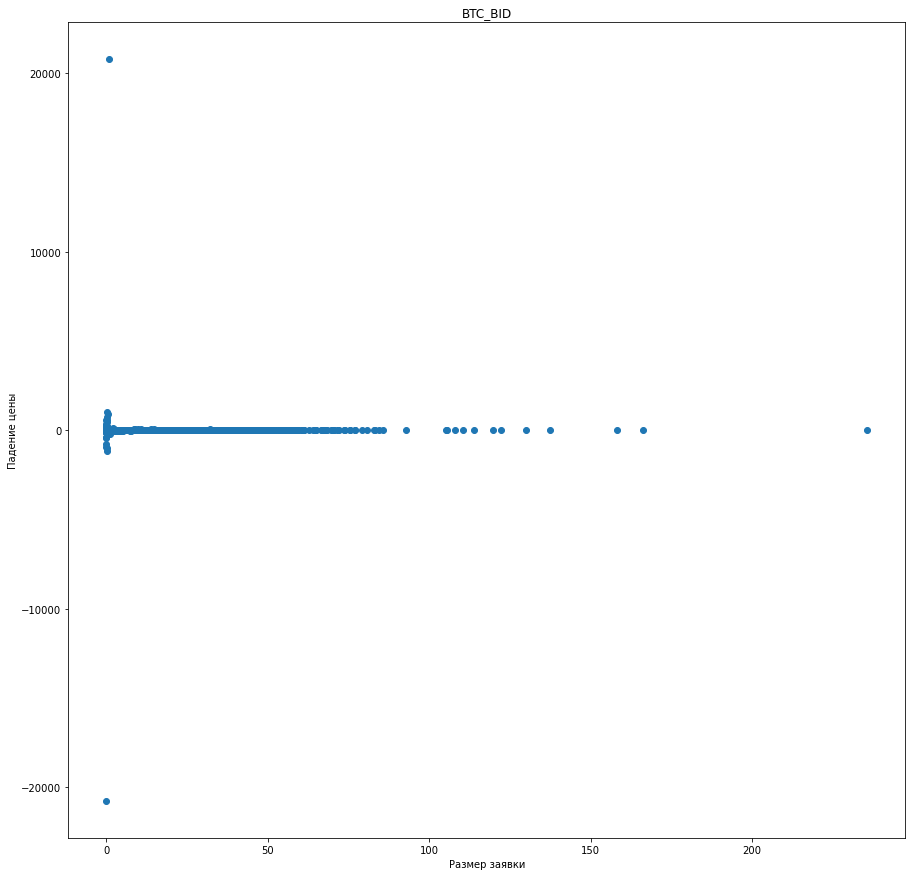

In [95]:
plt.figure(figsize = (15,15))
plt.scatter(order_sizes_btc_bid, diffs)
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("BTC_BID")
#Построим скаттерплот зависимости падения цены от размера заявки

Уберем 0:)

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/534058800.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  order_sizes_btc_bid = btc_trades[btc_trades['aggro_side'] == 'BID'][btc_trades['price'] > 18000].groupby('exchange_ts')['size'].sum()[1:]
/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/534058800.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prices_btc_bid = btc_trades[btc_trades['aggro_side'] == 'BID'][btc_trades['price'] > 18000].groupby('exchange_ts')['price'].last()


Text(0.5, 1.0, 'BTC_BID')

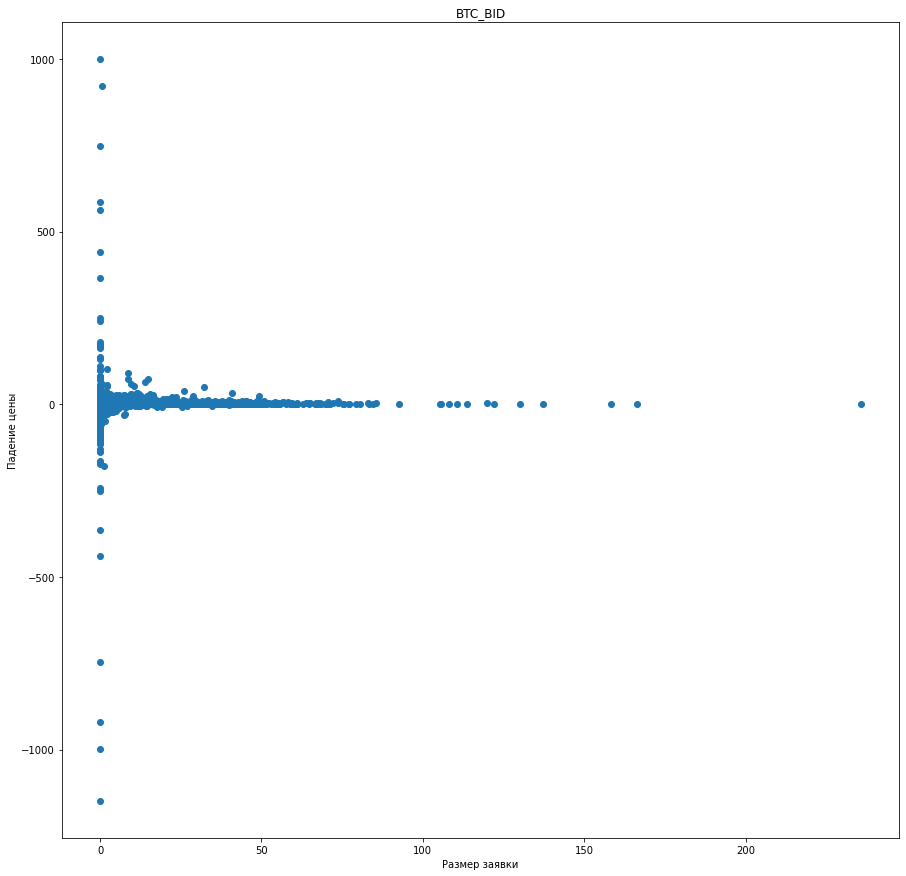

In [96]:
order_sizes_btc_bid = btc_trades[btc_trades['aggro_side'] == 'BID'][btc_trades['price'] > 18000].groupby('exchange_ts')['size'].sum()[1:]
prices_btc_bid = btc_trades[btc_trades['aggro_side'] == 'BID'][btc_trades['price'] > 18000].groupby('exchange_ts')['price'].last()
diffs = np.diff(prices_btc_bid)
plt.figure(figsize = (15,15))
plt.scatter(order_sizes_btc_bid, diffs)
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("BTC_BID")

Посмотрим на малые размеры заявок

In [97]:
data = pd.DataFrame({'diff': diffs, 'size': order_sizes_btc_bid})

Text(0.5, 1.0, 'BTC_BID')

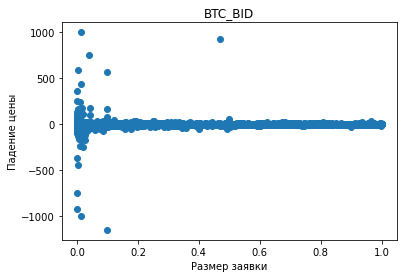

In [98]:
#Больше 1 BTC заявка
plt.scatter(data[data['size'] < 1]['size'], data[data['size'] < 1]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("BTC_BID")

Попробуем отследить динамику и повыкидывать большие изменения(можем сказать, что в основном сильно прошибает стакан на мелких заявках)

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/521475460.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data[data['size'] < 1][abs(data['diff']) < 100]['size'], data[data['size'] < 1][abs(data['diff']) < 100]['diff'])


Text(0.5, 1.0, 'BTC_BID')

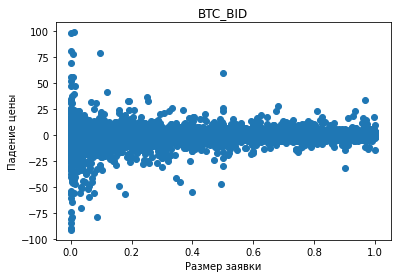

In [99]:
#Меньше 1 BTC и пробой меньше 100
plt.scatter(data[data['size'] < 1][abs(data['diff']) < 100]['size'], data[data['size'] < 1][abs(data['diff']) < 100]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("BTC_BID")



/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/211106647.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data[data['size'] < 1][abs(data['diff']) > 100]['size'], data[data['size'] < 1][abs(data['diff']) > 100]['diff'])


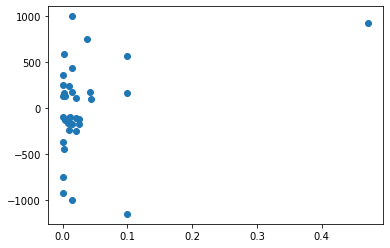

In [100]:
#Меньше 1 BTC и пробой больше 100
plt.scatter(data[data['size'] < 1][abs(data['diff']) > 100]['size'], data[data['size'] < 1][abs(data['diff']) > 100]['diff'])




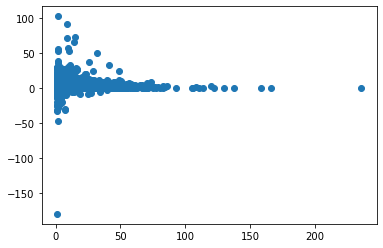

In [101]:
#Больше 1 BTC
plt.scatter(data[data['size'] > 1]['size'], data[data['size'] > 1]['diff'])

То есть как будто c ростом размера заявки стакан пробивается меньше

Смотрим на аски

Text(0.5, 1.0, 'BTC_ASK')

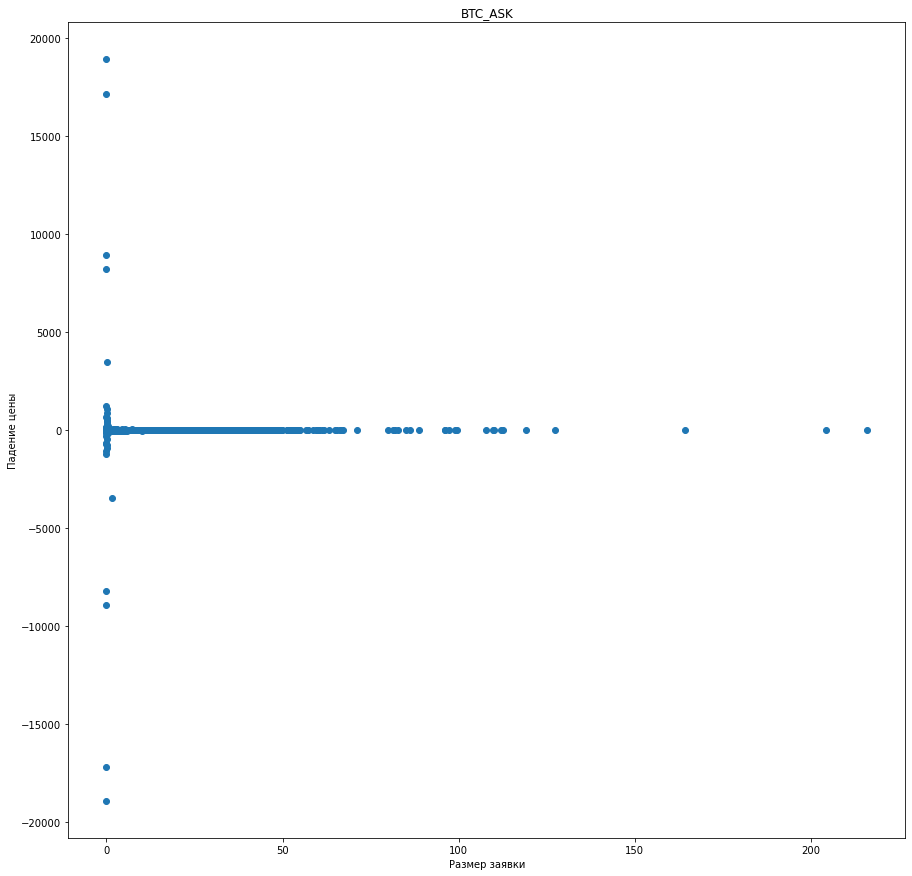

In [102]:
order_sizes_btc_ask = btc_trades[btc_trades['aggro_side'] == 'ASK'].groupby('exchange_ts')['size'].sum()[1:]
prices_btc_ask = btc_trades[btc_trades['aggro_side'] == 'ASK'].groupby('exchange_ts')['price'].last()
diffs = np.diff(prices_btc_ask)
plt.figure(figsize = (15,15))
plt.scatter(order_sizes_btc_ask, diffs)
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("BTC_ASK")

In [103]:
data_btc_ask = pd.DataFrame({'diff': diffs, 'size': order_sizes_btc_ask})

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/2854853649.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_btc_ask[data_btc_ask['size'] < 1][abs(data_btc_ask['diff']) < 100]['size'], data_btc_ask[data_btc_ask['size'] < 1][abs(data_btc_ask['diff']) < 100]['diff'])


Text(0.5, 1.0, 'BTC_ASK')

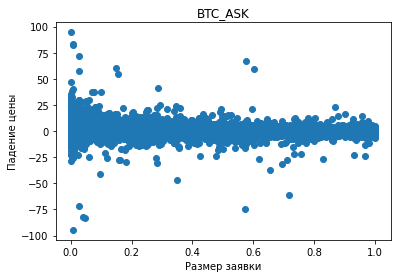

In [104]:
#Меньше 1 BTC и пробой меньше 100
plt.scatter(data_btc_ask[data_btc_ask['size'] < 1][abs(data_btc_ask['diff']) < 100]['size'], data_btc_ask[data_btc_ask['size'] < 1][abs(data_btc_ask['diff']) < 100]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("BTC_ASK")

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/2513213140.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_btc_ask[data_btc_ask['size'] < 1][abs(data_btc_ask['diff']) > 100]['size'], data_btc_ask[data_btc_ask['size'] < 1][abs(data_btc_ask['diff']) > 100]['diff'])


Text(0.5, 1.0, 'BTC_ASK')

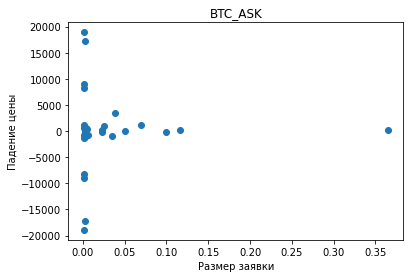

In [105]:
#Меньше 1 BTC и пробой больше 100
plt.scatter(data_btc_ask[data_btc_ask['size'] < 1][abs(data_btc_ask['diff']) > 100]['size'], data_btc_ask[data_btc_ask['size'] < 1][abs(data_btc_ask['diff']) > 100]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("BTC_ASK")

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/44955503.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_btc_ask[data_btc_ask['size'] > 1][abs(data_btc_ask['diff']) > 100]['size'], data_btc_ask[data_btc_ask['size'] > 1][abs(data_btc_ask['diff']) > 100]['diff'])


Text(0.5, 1.0, 'BTC_ASK')

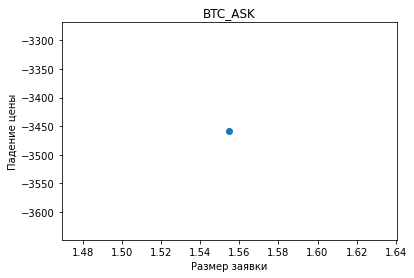

In [106]:
#Больше 1 BTC и пробой больше 100
plt.scatter(data_btc_ask[data_btc_ask['size'] > 1][abs(data_btc_ask['diff']) > 100]['size'], data_btc_ask[data_btc_ask['size'] > 1][abs(data_btc_ask['diff']) > 100]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("BTC_ASK")

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/2659580938.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_btc_ask[data_btc_ask['size'] > 1][abs(data_btc_ask['diff']) < 100]['size'], data_btc_ask[data_btc_ask['size'] > 1][abs(data_btc_ask['diff']) < 100]['diff'])


Text(0.5, 1.0, 'BTC_ASK')

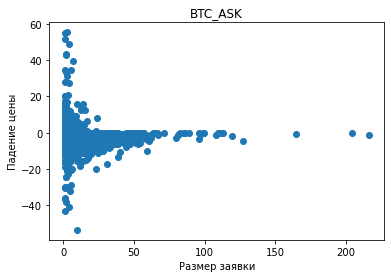

In [107]:
#Больше 1 BTC и пробой меньше 100
plt.scatter(data_btc_ask[data_btc_ask['size'] > 1][abs(data_btc_ask['diff']) < 100]['size'], data_btc_ask[data_btc_ask['size'] > 1][abs(data_btc_ask['diff']) < 100]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("BTC_ASK")

Эфир

Text(0.5, 1.0, 'ETH_ASK')

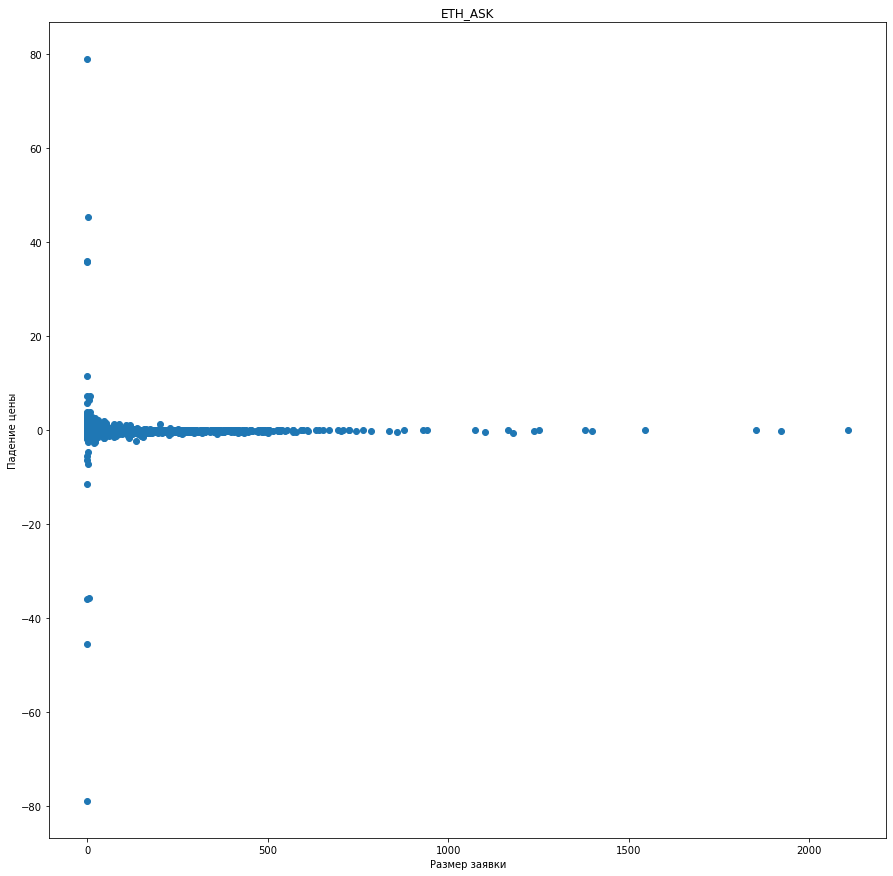

In [108]:
order_sizes_eth_ask = eth_trades[eth_trades['aggro_side'] == 'ASK'].groupby('exchange_ts')['size'].sum()[1:]
prices_eth_ask = eth_trades[eth_trades['aggro_side'] == 'ASK'].groupby('exchange_ts')['price'].last()
diffs = np.diff(prices_eth_ask)
plt.figure(figsize = (15,15))
plt.scatter(order_sizes_eth_ask, diffs)
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_ASK")

In [109]:
data_eth_ask = pd.DataFrame({'diff': diffs, 'size': order_sizes_eth_ask})

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/4231502957.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) > 10]['size'], data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) > 10]['diff'])


Text(0.5, 1.0, 'ETH_ASK')

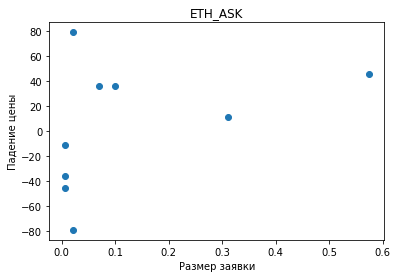

In [110]:
#Больше 1 ETH и пробой больше 10
plt.scatter(data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) > 10]['size'], data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) > 10]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_ASK")

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/3483901702.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_eth_ask[data_eth_ask['size'] > 1][abs(data_eth_ask['diff']) < 10]['size'], data_eth_ask[data_eth_ask['size'] > 1][abs(data_eth_ask['diff']) < 10]['diff'])


Text(0.5, 1.0, 'ETH_ASK')

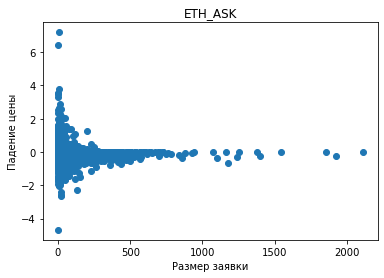

In [111]:
#Больше 1 ETH и пробой меньше 10
plt.scatter(data_eth_ask[data_eth_ask['size'] > 1][abs(data_eth_ask['diff']) < 10]['size'], data_eth_ask[data_eth_ask['size'] > 1][abs(data_eth_ask['diff']) < 10]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_ASK")

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/419847186.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) < 10]['size'], data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) < 10]['diff'])


Text(0.5, 1.0, 'ETH_ASK')

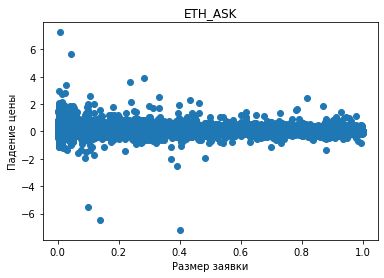

In [112]:
#Меньше 1 ETH и пробой меньше 10
plt.scatter(data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) < 10]['size'], data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) < 10]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_ASK")

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/1178030956.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) > 10]['size'], data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) > 10]['diff'])


Text(0.5, 1.0, 'ETH_ASK')

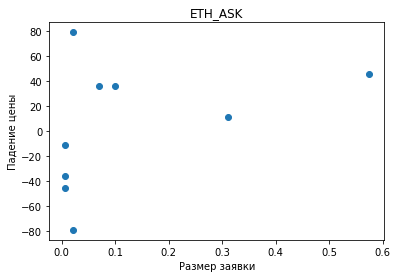

In [113]:
#Меньше 1 ETH и пробой больше 10
plt.scatter(data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) > 10]['size'], data_eth_ask[data_eth_ask['size'] < 1][abs(data_eth_ask['diff']) > 10]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_ASK")

Text(0.5, 1.0, 'ETH_BID')

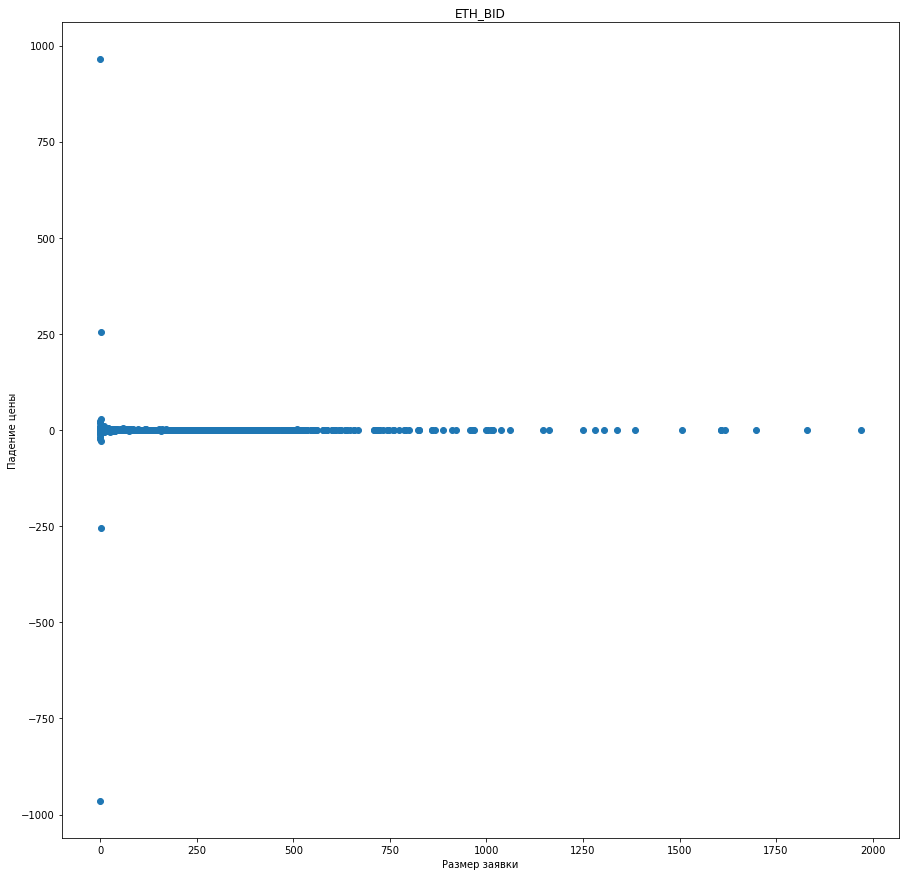

In [114]:
#Смотрим BID
order_sizes_eth_bid = eth_trades[eth_trades['aggro_side'] == 'BID'].groupby('exchange_ts')['size'].sum()[1:]
prices_eth_bid = eth_trades[eth_trades['aggro_side'] == 'BID'].groupby('exchange_ts')['price'].last()
diffs = np.diff(prices_eth_bid)
plt.figure(figsize = (15,15))
plt.scatter(order_sizes_eth_bid, diffs)
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_BID")

In [115]:
data_eth_bid = pd.DataFrame({'diff': diffs, 'size': order_sizes_eth_bid})

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/1383166249.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_eth_bid[data_eth_bid['size'] < 1][abs(data_eth_bid['diff']) > 10]['size'], data_eth_bid[data_eth_bid['size'] < 1][abs(data_eth_bid['diff']) > 10]['diff'])


Text(0.5, 1.0, 'ETH_BID')

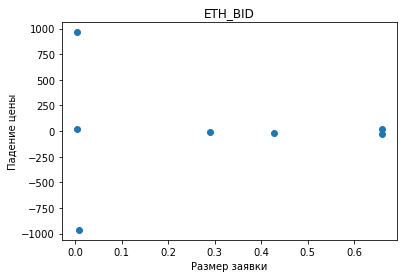

In [116]:
#Меньше 1 ETH и пробой больше 10
plt.scatter(data_eth_bid[data_eth_bid['size'] < 1][abs(data_eth_bid['diff']) > 10]['size'], data_eth_bid[data_eth_bid['size'] < 1][abs(data_eth_bid['diff']) > 10]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_BID")

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/2814084576.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_eth_bid[data_eth_bid['size'] < 1][abs(data_eth_bid['diff']) < 10]['size'], data_eth_bid[data_eth_bid['size'] < 1][abs(data_eth_bid['diff']) < 10]['diff'])


Text(0.5, 1.0, 'ETH_BID')

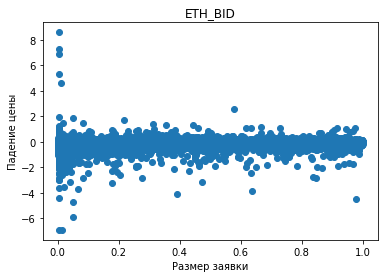

In [117]:
#Меньше 1 ETH и пробой меньше 10
plt.scatter(data_eth_bid[data_eth_bid['size'] < 1][abs(data_eth_bid['diff']) < 10]['size'], data_eth_bid[data_eth_bid['size'] < 1][abs(data_eth_bid['diff']) < 10]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_BID")

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/1216280018.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_eth_bid[data_eth_bid['size'] > 1][abs(data_eth_bid['diff']) < 10]['size'], data_eth_bid[data_eth_bid['size'] > 1][abs(data_eth_bid['diff']) < 10]['diff'])


Text(0.5, 1.0, 'ETH_BID')

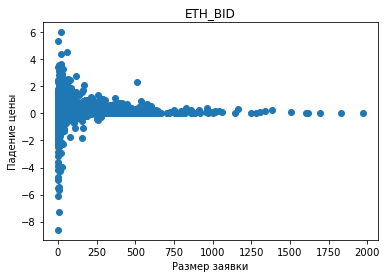

In [118]:
#Больше 1 ETH и пробой меньше 10
plt.scatter(data_eth_bid[data_eth_bid['size'] > 1][abs(data_eth_bid['diff']) < 10]['size'], data_eth_bid[data_eth_bid['size'] > 1][abs(data_eth_bid['diff']) < 10]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_BID")

/var/folders/pr/lz5b0sss63764x9x198lpy8w0000gn/T/ipykernel_8920/691921437.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(data_eth_bid[data_eth_bid['size'] > 1][abs(data_eth_bid['diff']) > 10]['size'], data_eth_bid[data_eth_bid['size'] > 1][abs(data_eth_bid['diff']) > 10]['diff'])


Text(0.5, 1.0, 'ETH_BID')

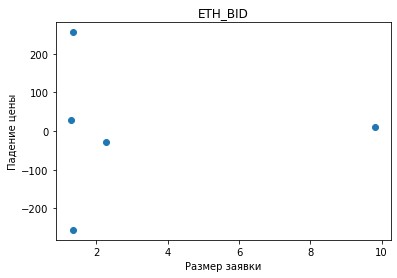

In [119]:
#Больше 1 ETH и пробой больше 10
plt.scatter(data_eth_bid[data_eth_bid['size'] > 1][abs(data_eth_bid['diff']) > 10]['size'], data_eth_bid[data_eth_bid['size'] > 1][abs(data_eth_bid['diff']) > 10]['diff'])
plt.xlabel("Размер заявки")
plt.ylabel("Падение цены")
plt.title("ETH_BID")

# Пункт 5. ETH/BTC корреляции

Давайте посмотрим относительную величину спрэда

In [120]:
best_btc_ask = btc_lobs['ask_price_0']
best_btc_bid = btc_lobs['bid_price_0']
best_eth_ask = eth_lobs['ask_price_0']
best_eth_bid = eth_lobs['bid_price_0']

In [121]:
cond_spread_btc = (best_btc_ask - best_btc_bid)/best_btc_ask
cond_spread_eth = (best_eth_ask - best_eth_bid)/best_eth_ask

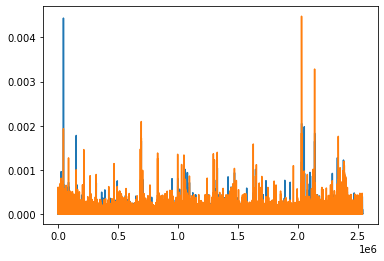

In [122]:
plt.plot(cond_spread_btc)
plt.plot(cond_spread_eth)

На этом графике порядки относительных спрэдов не различаются
Понизим порядок

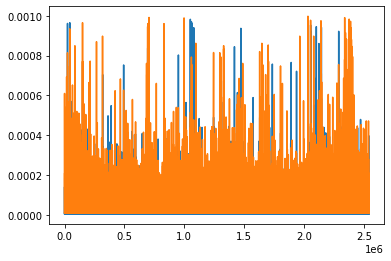

In [123]:
plt.plot(cond_spread_btc[cond_spread_btc < 0.001])
plt.plot(cond_spread_eth[cond_spread_eth < 0.001])

Глянем общую корреляцию

In [143]:
np.corrcoef(cond_spread_btc[:2430000], cond_spread_eth[:2430000])

array([[1.        , 0.05832027],
       [0.05832027, 1.        ]])